In [103]:
#Import necessary libraries

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [104]:
#Import cleaned Dataset

data = pd.read_csv("Cleaned_Dataset.csv")

In [105]:
#Create a correlation matrix

corrmat = data.corr()
corrmat

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.408539 -0.341065     0.052250    -0.061190   
LotFrontage     -0.408539     1.000000  0.487051     0.192187    -0.050378   
LotArea         -0.341065     0.487051  1.000000     0.139304    -0.000538   
OverallQual      0.052250     0.192187  0.139304     1.000000    -0.107514   
OverallCond     -0.061190    -0.050378 -0.000538    -0.107514     1.000000   
YearBuilt        0.036154     0.119580  0.031230     0.588462    -0.367536   
YearRemodAdd     0.048308     0.061964  0.018090     0.545312     0.070457   
MasVnrArea       0.022395     0.170090  0.119636     0.391355    -0.126480   
BsmtFinSF1      -0.071001     0.120348  0.163545     0.195854    -0.025961   
BsmtFinSF2      -0.059646     0.037691  0.094054    -0.060928     0.055081   
BsmtUnfSF       -0.135192     0.142532  0.059507     0.298648    -0.155246   
TotalBsmtSF     -0.250168     0.301954  0.278834     0.515510    -0.177559   
1stFlrSF        -0.261752     0.357521  0.371938     0.436162    -0.152141   
2ndFlrSF         0.312502     0.036718  0.078985     0.263925     0.012629   
GrLivArea        0.085095     0.306808  0.353272     0.562736    -0.103783   
BsmtFullBath     0.007682     0.050499  0.085338     0.100136    -0.035892   
BsmtHalfBath    -0.005534    -0.013227  0.041088    -0.053297     0.115466   
FullBath         0.134376     0.161990  0.165211     0.534349    -0.219877   
HalfBath         0.177883     0.047846  0.072490     0.266675    -0.059955   
BedroomAbvGr    -0.039564     0.257138  0.265313     0.085936     0.003468   
KitchenAbvGr     0.279905     0.008185 -0.003470    -0.181947    -0.088453   
TotRmsAbvGrd     0.037979     0.301090  0.309013     0.387099    -0.071598   
Fireplaces      -0.045307     0.214871  0.286804     0.376869    -0.031042   
GarageYrBlt      0.084993     0.053478 -0.029593     0.521319    -0.310260   
GarageCars      -0.039315     0.276916  0.239643     0.593740    -0.185825   
GarageArea      -0.103004     0.308702  0.262863     0.550312    -0.152691   
WoodDeckSF      -0.032193     0.091299  0.195891     0.241526     0.009967   
OpenPorchSF      0.004396     0.125870  0.132399     0.320665    -0.059174   
EnclosedPorch   -0.014318    -0.007451 -0.009969    -0.124359     0.088113   
3SsnPorch       -0.025459     0.042573  0.072189     0.033850     0.062971   
ScreenPorch     -0.025902     0.041518  0.099037     0.040259     0.051167   
MiscVal         -0.062262     0.005346  0.016214    -0.048638     0.074849   
MoSold          -0.008246     0.012828 -0.013703     0.079721    -0.000363   
YrSold          -0.019327     0.008592 -0.020178    -0.027692     0.042301   
SalePrice       -0.080917     0.341957  0.348147     0.806303    -0.092653   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.036154      0.048308    0.022395   -0.071001   -0.059646   
LotFrontage     0.119580      0.061964    0.170090    0.120348    0.037691   
LotArea         0.031230      0.018090    0.119636    0.163545    0.094054   
OverallQual     0.588462      0.545312    0.391355    0.195854   -0.060928   
OverallCond    -0.367536      0.070457   -0.126480   -0.025961    0.055081   
YearBuilt       1.000000      0.596520    0.313940    0.240966   -0.049469   
YearRemodAdd    0.596520      1.000000    0.162528    0.115413   -0.060895   
MasVnrArea      0.313940      0.162528    1.000000    0.221380   -0.070548   
BsmtFinSF1      0.240966      0.115413    0.221380    1.000000   -0.067578   
BsmtFinSF2     -0.049469     -0.060895   -0.070548   -0.067578    1.000000   
BsmtUnfSF       0.151200      0.173331    0.110583   -0.541246   -0.216072   
TotalBsmtSF     0.404553      0.290621    0.329962    0.437385    0.096529   
1stFlrSF        0.281118      0.228890    0.315437    0.358549    0.095565   
2ndFlrSF        0.010458      0.123539    0.128926   -0.196040   -0.095787   
GrLivArea       0.206920      0.2780

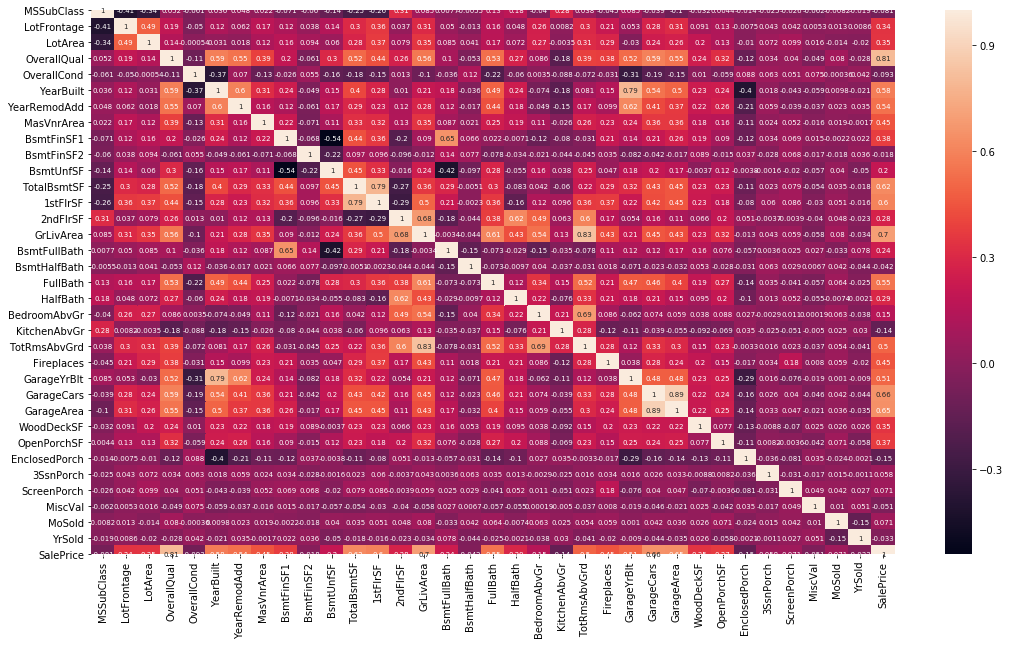

In [106]:
#Plot the correlation matrix as heatmap

fig ,ax =plt.subplots(figsize=(18,10))
sns.heatmap(corrmat,annot=True,annot_kws={'size':7})

In [165]:
#Define a function to find out the attributes that have an correlation value above the threshold 

def getcorf(corrdata,thresh):
    features = []
    value = []
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])>thresh:
            features.append(index)
            value.append(corrdata[index])
    df = pd.DataFrame(data = value ,index = features, columns=['Corr Value'])
    return df

In [166]:
#Find the columns that are corelated 

thresh = 0.3
corr_val = getcorf(corrmat['SalePrice'],thresh)
corr_val

Corr Value
LotFrontage     0.341957
LotArea         0.348147
OverallQual     0.806303
YearBuilt       0.579006
YearRemodAdd    0.540456
MasVnrArea      0.450895
BsmtFinSF1      0.379478
TotalBsmtSF     0.624244
1stFlrSF        0.599187
GrLivArea       0.696987
FullBath        0.550942
TotRmsAbvGrd    0.498521
Fireplaces      0.449767
GarageYrBlt     0.505496
GarageCars      0.655555
GarageArea      0.646680
WoodDeckSF      0.346825
OpenPorchSF     0.369941
SalePrice       1.000000

In [167]:
#Use only the correlated columns for the models

cor_data = data[corr_val.index]
cor_data.head()

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0         65.0     8450            7       2003          2003       196.0   
1         80.0     9600            6       1976          1976         0.0   
2         68.0    11250            7       2001          2002       162.0   
3         60.0     9550            7       1915          1970         0.0   
4         84.0    14260            8       2000          2000       350.0   

   BsmtFinSF1  TotalBsmtSF  1stFlrSF  GrLivArea  FullBath  TotRmsAbvGrd  \
0         706          856       856       1710         2             8   
1         978         1262      1262       1262         2             6   
2         486          920       920       1786         2             6   
3         216          756       961       1717         1             7   
4         655         1145      1145       2198         2             9   

   Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0           0       2003.0           2         548           0           61   
1           1       1976.0           2         460         298            0   
2           1       2001.0           2         608           0           42   
3           1       1998.0           3         642           0           35   
4           1       2000.0           3         836         192           84   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

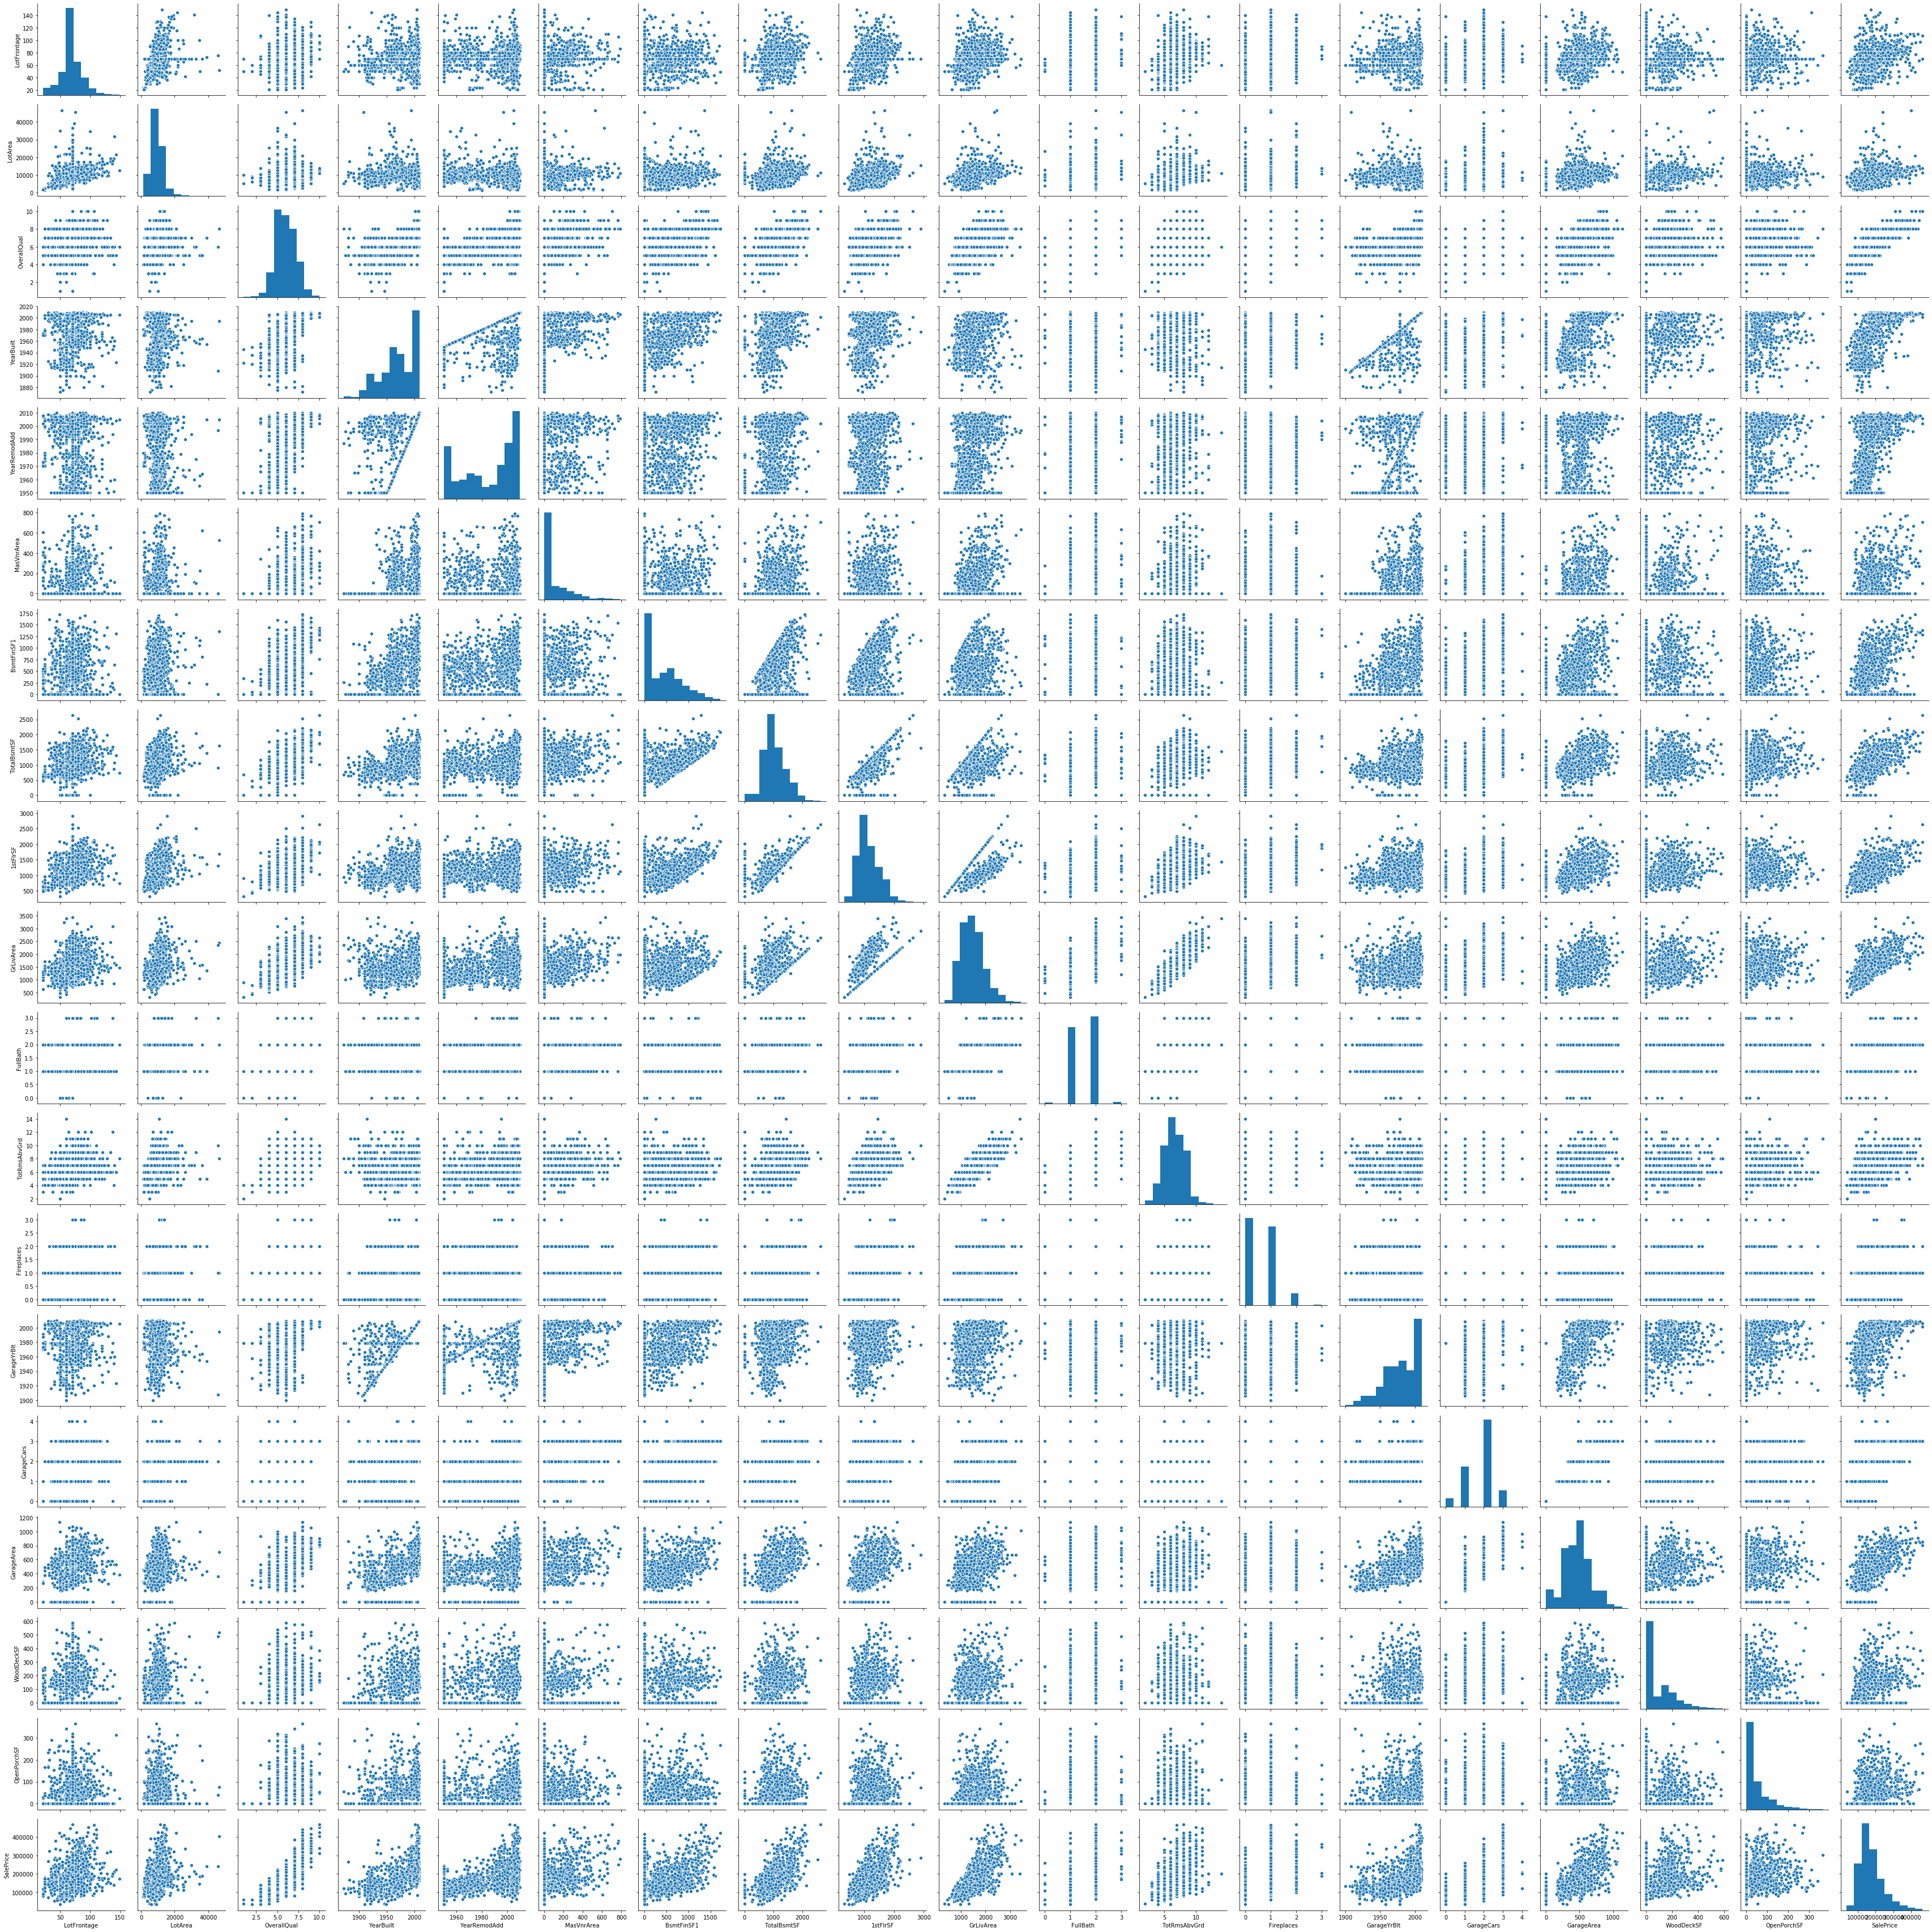

In [194]:
sns.pairplot(cor_data)
plt.tight_layout()

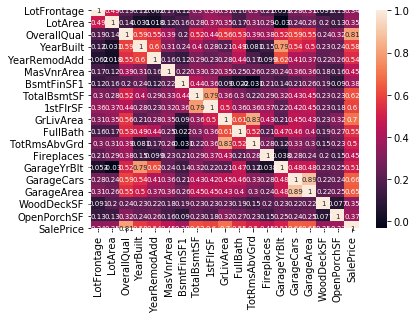

In [169]:
sns.heatmap(cor_data.corr(),annot=True,annot_kws={'size':7})

In [170]:
datax = cor_data.drop(labels=['SalePrice'],axis = 1)

In [171]:
datax.head()

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0         65.0     8450            7       2003          2003       196.0   
1         80.0     9600            6       1976          1976         0.0   
2         68.0    11250            7       2001          2002       162.0   
3         60.0     9550            7       1915          1970         0.0   
4         84.0    14260            8       2000          2000       350.0   

   BsmtFinSF1  TotalBsmtSF  1stFlrSF  GrLivArea  FullBath  TotRmsAbvGrd  \
0         706          856       856       1710         2             8   
1         978         1262      1262       1262         2             6   
2         486          920       920       1786         2             6   
3         216          756       961       1717         1             7   
4         655         1145      1145       2198         2             9   

   Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  
0           0       2003.0           2         548           0           61  
1           1       1976.0           2         460         298            0  
2           1       2001.0           2         608           0           42  
3           1       1998.0           3         642           0           35  
4           1       2000.0           3         836         192           84

In [172]:
#Split the datset into test and train set

X_train,X_test,y_train,y_test = train_test_split(datax, data.SalePrice,train_size=0.7)

In [173]:
#Perform one label encoding to the categorical attributes


object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# Columns that can be safely label encoded
good_label_cols = [col for col in object_cols if 
                   set(X_train[col]) == set(X_test[col])]
        
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))
        
print('Categorical columns that will be label encoded:', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

Categorical columns that will be label encoded: []

Categorical columns that will be dropped from the dataset: []


In [174]:
from sklearn.preprocessing import LabelEncoder

# Drop categorical columns that will not be encoded
label_X_train = X_train.drop(bad_label_cols, axis=1)
label_X_test = X_test.drop(bad_label_cols, axis=1)

# Apply label encoder
label_encoder = LabelEncoder()

for col in good_label_cols:
    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_test[col] = label_encoder.transform(X_test[col])


In [175]:
regname = ['Linear Reg', 'Random Forest Reg', 'Xgb Reg']
regscore = []

In [176]:
################LINEAR REGRESSION###################

In [177]:
linreg = LinearRegression()

In [178]:
linreg.fit(label_X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [179]:
y_pred = linreg.predict(label_X_test)

In [180]:
mean_absolute_error(y_test, y_pred)

18696.21018954037

In [181]:
a = linreg.score(label_X_test,y_test)
print(a)
regscore.append(a)

0.8472656828189506


In [182]:
x = [x for x in range(0,400000)]

Text(0.5, 1.0, 'Actual Prices vs Predicted Price')

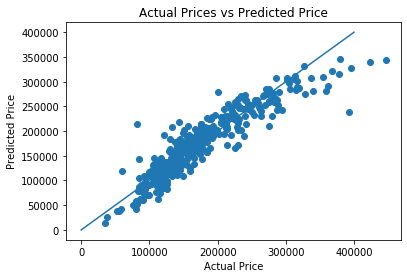

In [183]:
plt.scatter(y_test, y_pred)
plt.plot(x,x)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Price")

In [184]:
###################RANDOM FOREST REGRESSOR###########################

In [185]:
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(label_X_train, y_train)
y_pred = rf.predict(label_X_test)

In [186]:
a = rf.score(label_X_test,y_test)
print(a)
regscore.append(a)

0.8754800509937634


Text(0.5, 1.0, 'Actual Prices vs Predicted Price')

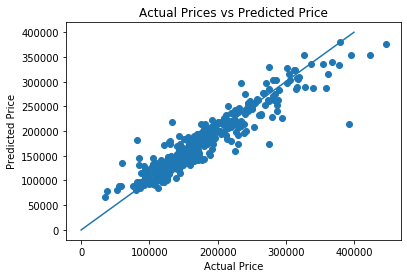

In [187]:
plt.scatter(y_test, y_pred)
plt.plot(x,x)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Price")

In [188]:
####################XGB REGRESSOR############################

In [189]:
import xgboost as xgb

In [190]:
xg = xgb.XGBRegressor()
xg.fit(label_X_train,y_train)
y_pred = xg.predict(label_X_test)

In [191]:
a = xg.score(label_X_test,y_test)
print(a)
regscore.append(a)

0.8560649985777776


Text(0.5, 1.0, 'Actual Prices vs Predicted Price')

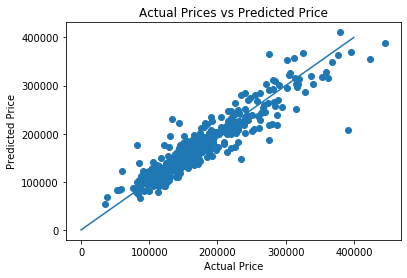

In [192]:
plt.scatter(y_test, y_pred)
plt.plot(x,x)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Price")

Text(0.5, 1.0, 'Comparison of different regression models')

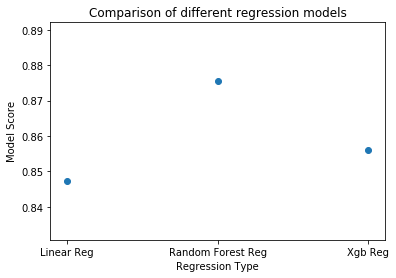

In [193]:
plt.scatter(regname,regscore)
plt.xlabel("Regression Type")
plt.ylabel("Model Score")
plt.title("Comparison of different regression models")